Task 1
Description: 
- Read data from a file about career aspirations.
- Correct the spelling mistakes and print the corrected data.
- Plot the career aspirations using a bar graph.

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

We will proceed using Levenshtein distance method.
First let us create a function for calculating Levenschtein distance between two strings.
This can be done either by iteration or recursion.I have used iteration.
Here is a breakdown of the code:
- len1 and len2 store the lengths of word1 and word2 respectively.
- dp is a 2D list initialized with zeros, where dp[i][j] represents the Levenshtein distance between the first i characters of word1 and the first j    characters of word2.
- The nested loop iterates over all possible pairs of indices (i, j) within the bounds of len1 and len2.
- The base cases are handled first:
  - If i (representing the length of word1) is 0, the distance is j (since we need to insert j characters into an empty string to make it word2).
  - If j (representing the length of word2) is 0, the distance is i (similarly, we need to delete i characters from word1 to make it an empty string).
- For other cases, if the characters at word1[i - 1] and word2[j - 1] are the same, no operation is needed, and the distance remains the same as for    the previous substrings (dp[i - 1][j - 1]).
  If the characters are different, we consider three possible operations:
   - Deletion: dp[i - 1][j] + 1
   - Insertion: dp[i][j - 1] + 1
   - Substitution: dp[i - 1][j - 1] + 1
  We take the minimum of these three values and store it in dp[i][j].
- Finally, we return dp[len1][len2], which represents the Levenshtein distance between the entire word1 and word2.


In [2]:
# Function to calculate Levenshtein distance between two words
def levenshtein_distance(word1, word2):
    len1, len2 = len(word1), len(word2)
    dp = [[0] * (len2 + 1) for _ in range(len1 + 1)]

    for i in range(len1 + 1):
        for j in range(len2 + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i - 1][j], dp[i][j - 1], dp[i - 1][j - 1])

    return dp[len1][len2]

Now let us create a function which calculates Levenschtein distance of the given word from all possible career options and returns the career option which is the nearest.
The word and career options are converted into lower case using lower().

In [3]:
# Function to correct spelling mistakes in career options
def correct_spelling(word, career_options):
    word = word.lower()
    career_options = [option.lower() for option in career_options]
    min_distance = float('inf')
    correct_word = ""
    
    for option in career_options:
        distance = levenshtein_distance(word, option)
        if distance < min_distance:
            min_distance = distance
            correct_word = option
            
    return correct_word.capitalize()

Now for making a bar graph, we will make use of matplotlib library.
The plot_career_aspirations function takes the corrected career aspirations, counts the frequency of each career option, and plots a bar chart showing the distribution of these aspirations. The chart is customized with axis labels, a title, rotated x-axis labels for better readability, and adjusted layout to ensure everything fits well. The bars are colored orange for better visual distinction.

In [4]:
def plot_career_aspirations(corrected_responses, career_options):
    # Count the frequency of each career option
    career_counts = {career: corrected_responses.count(career) for career in career_options}

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(career_counts.keys(), career_counts.values(), color='orange')
    plt.xlabel('Career Options')
    plt.ylabel('Frequency')
    plt.title('Career Aspirations of Students')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [5]:
#Creating a list of career options
career_options = ["Doctor", "Lawyer", "Teacher", "Engineer", "Accountant", 
                  "Nurse", "Police", "Architect", "Dentist", "Pharmacist"]


Now let us read data from the google sheet using pandas.
First convert the sheet into a csv file and use read_csv() function.
Read this data and store as a data frame.

In [ ]:
# Save the google sheet URL in a variable
input_data_file="career choices.csv"
data_frame_excel = pd.read_csv(input_data_file, header=None)

Now let us create a list from the data frame.

In [7]:
# Since the misspelled career options are in the first column
responses_list = data_frame_excel.iloc[:, 0].tolist()

Now we will create a list of corrected responses using the correct_spelling function and print the corrected list.

In [8]:
corrected_responses = [correct_spelling(response, career_options) for response in responses_list]


Finally we will plot the bar graph using this list.

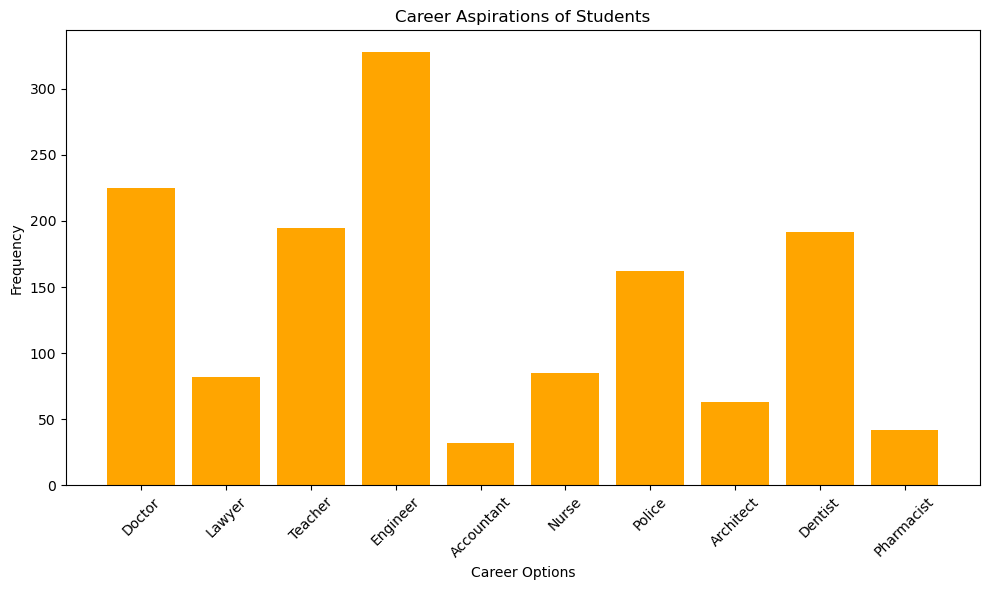

In [9]:
plot_career_aspirations(corrected_responses, career_options)